## AI-Powered Customer Purchase Analysis 
## Data Analysis
This notebook contains unique insights with visualizations to deeply understand customer behavior.

This project is part of coding assignment for a position at BookedBy

Author @Suchit Singh Nagpal (sn3791@rit.edu)

Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [2]:
# Load data with Order ID
df = pd.read_csv("data/customer_purchases3.csv")
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

Required Insights

# Top-Selling Categories

Identify the top-selling categories by total revenue and purchase frequency.

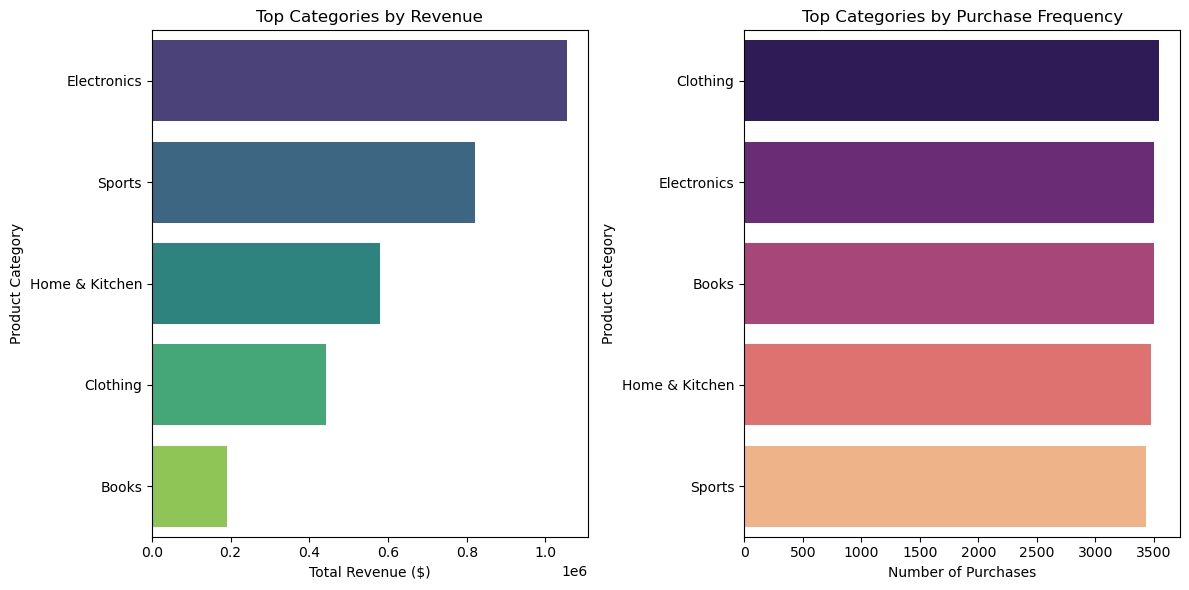

In [3]:
# Calculate total revenue and purchase frequency per category
category_revenue = df.groupby('Product Category')['Purchase Amount'].sum().sort_values(ascending=False)
category_frequency = df['Product Category'].value_counts()

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='viridis')
plt.title('Top Categories by Revenue')
plt.xlabel('Total Revenue ($)')

plt.subplot(1, 2, 2)
sns.barplot(x=category_frequency.values, y=category_frequency.index, palette='magma')
plt.title('Top Categories by Purchase Frequency')
plt.xlabel('Number of Purchases')

plt.tight_layout()
plt.show()

# Top-Selling Products

Identify the top-selling products by total revenue and purchase frequency.

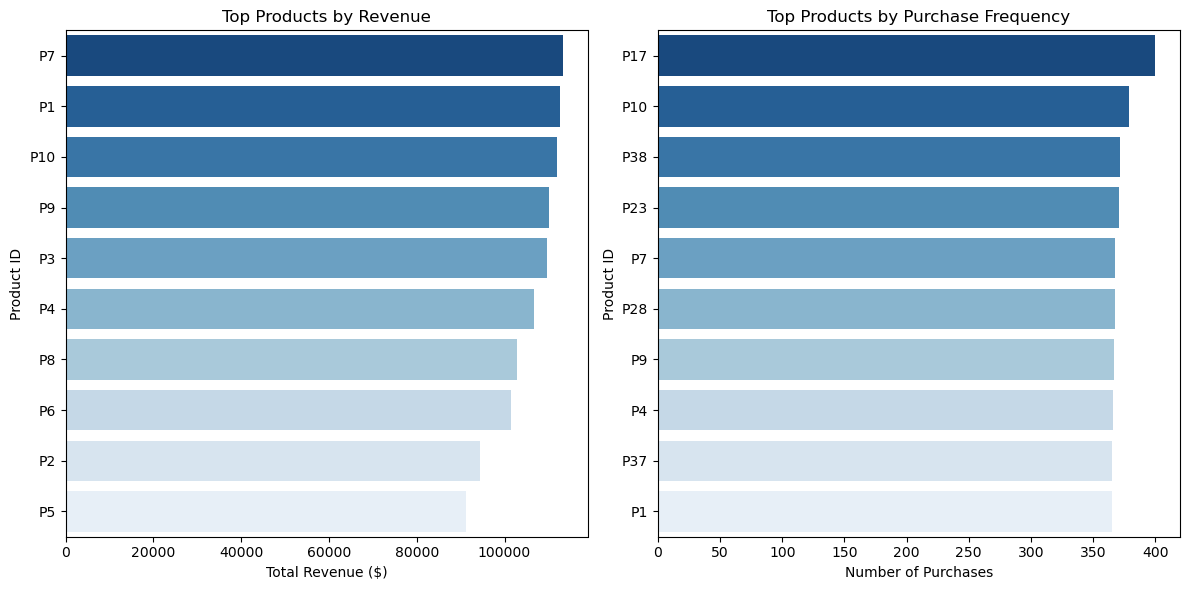

In [4]:
# Calculate total revenue and purchase frequency per product
product_revenue = df.groupby('Product ID')['Purchase Amount'].sum().sort_values(ascending=False).head(10)
product_frequency = df['Product ID'].value_counts().head(10)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=product_revenue.values, y=product_revenue.index, palette='Blues_r')
plt.title('Top Products by Revenue')
plt.xlabel('Total Revenue ($)')

plt.subplot(1, 2, 2)
sns.barplot(x=product_frequency.values, y=product_frequency.index, palette='Blues_r')
plt.title('Top Products by Purchase Frequency')
plt.xlabel('Number of Purchases')

plt.tight_layout()
plt.show()

# Average Customer Spending per Order

Calculate the average spending per order for each customer and analyze the distribution.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


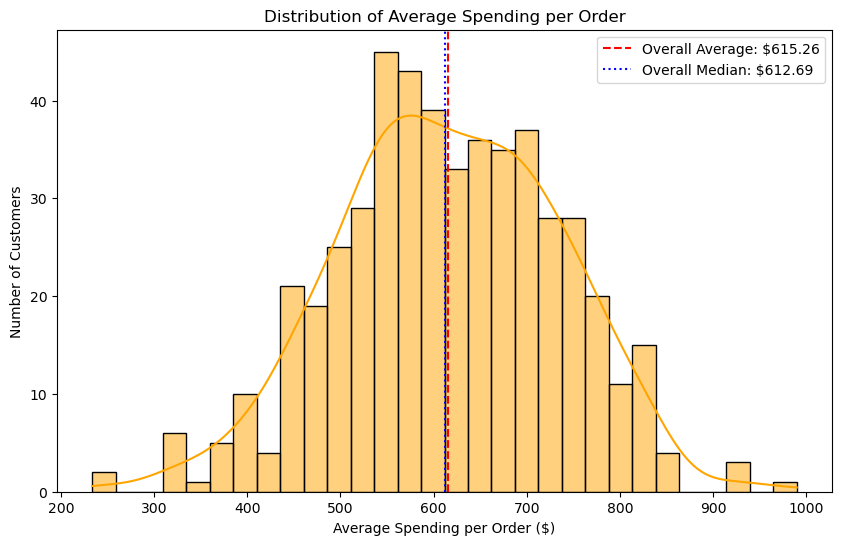

In [5]:
# Calculate total spending and number of orders per customer
customer_order_spending = df.groupby(['Customer ID', 'Order ID'])['Purchase Amount'].sum().reset_index()
customer_avg_spending_per_order = customer_order_spending.groupby('Customer ID')['Purchase Amount'].mean()

# Calculate overall average and median spending per order
overall_avg_spending_per_order = customer_avg_spending_per_order.mean()
overall_median_spending_per_order = customer_avg_spending_per_order.median()

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(customer_avg_spending_per_order, bins=30, kde=True, color='orange')

# Plot the overall average spending per order
plt.axvline(overall_avg_spending_per_order, color='red', linestyle='--', 
            label=f'Overall Average: ${overall_avg_spending_per_order:.2f}')

# Plot the overall median spending per order
plt.axvline(overall_median_spending_per_order, color='blue', linestyle=':', 
            label=f'Overall Median: ${overall_median_spending_per_order:.2f}')

plt.title('Distribution of Average Spending per Order')
plt.xlabel('Average Spending per Order ($)')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()


# Top Customers by Average Spending per Order

Identify the top 10 customers with the highest average spending per order.

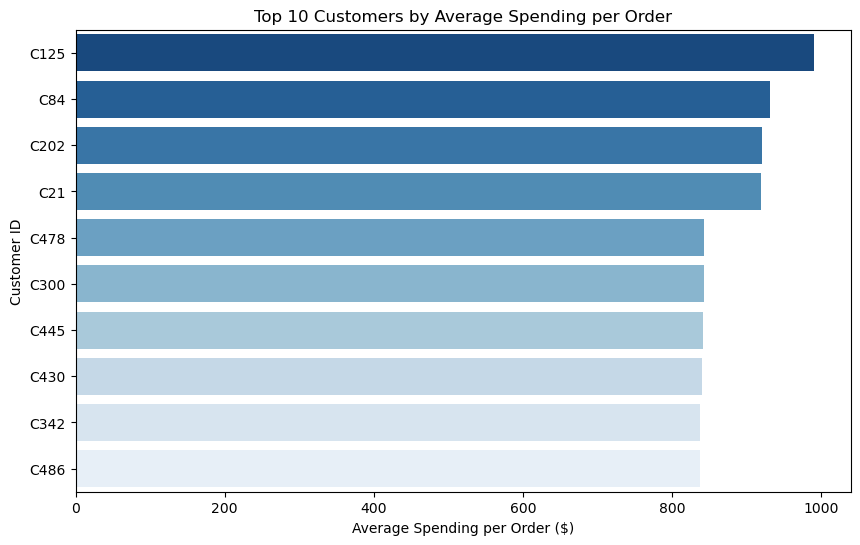

In [6]:
# Sort customers by average spending per order
top_customers_avg_spending = customer_avg_spending_per_order.sort_values(ascending=False).head(10)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers_avg_spending.values, y=top_customers_avg_spending.index, palette='Blues_r')
plt.title('Top 10 Customers by Average Spending per Order')
plt.xlabel('Average Spending per Order ($)')
plt.ylabel('Customer ID')
plt.show()


# Correlation Between No. of Orders and Avg Spending per Order

Analyze if customers with more orders tend to spend more or less per order.


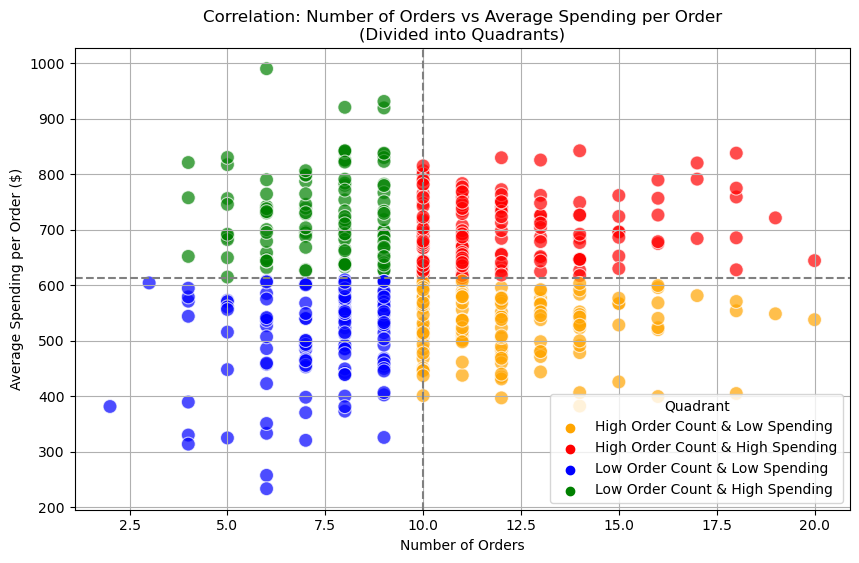

In [7]:
# Calculate number of orders per customer
customer_num_orders = df.groupby('Customer ID')['Order ID'].nunique()

# Combine with average spending per order (assuming customer_avg_spending_per_order is already computed)
customer_order_behavior = pd.DataFrame({
    'Number of Orders': customer_num_orders,
    'Average Spending per Order': customer_avg_spending_per_order
})

# Compute median values to use as thresholds for quadrants
median_orders = customer_order_behavior['Number of Orders'].median()
median_spending = customer_order_behavior['Average Spending per Order'].median()

# Create a new column 'Quadrant' based on these medians
def assign_quadrant(row):
    if row['Number of Orders'] < median_orders and row['Average Spending per Order'] < median_spending:
        return 'Low Order Count & Low Spending'
    elif row['Number of Orders'] < median_orders and row['Average Spending per Order'] >= median_spending:
        return 'Low Order Count & High Spending'
    elif row['Number of Orders'] >= median_orders and row['Average Spending per Order'] < median_spending:
        return 'High Order Count & Low Spending'
    else:
        return 'High Order Count & High Spending'

customer_order_behavior['Quadrant'] = customer_order_behavior.apply(assign_quadrant, axis=1)

# Define a color mapping for each quadrant
quadrant_colors = {
    'Low Order Count & Low Spending': 'blue',
    'Low Order Count & High Spending': 'green',
    'High Order Count & Low Spending': 'orange',
    'High Order Count & High Spending': 'red'
}

# Visualization: scatter plot divided into quadrants
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_order_behavior, 
                x='Number of Orders', 
                y='Average Spending per Order', 
                hue='Quadrant', 
                palette=quadrant_colors,
                s=100, 
                alpha=0.7)

# Draw vertical and horizontal lines to indicate the median thresholds (quadrant boundaries)
plt.axvline(median_orders, color='grey', linestyle='--')
plt.axhline(median_spending, color='grey', linestyle='--')

plt.title('Correlation: Number of Orders vs Average Spending per Order\n(Divided into Quadrants)')
plt.xlabel('Number of Orders')
plt.ylabel('Average Spending per Order ($)')
plt.grid(True)
plt.legend(title='Quadrant')
plt.show()

# Average Spending per Order by Category

Analyze how average spending per order varies across product categories.

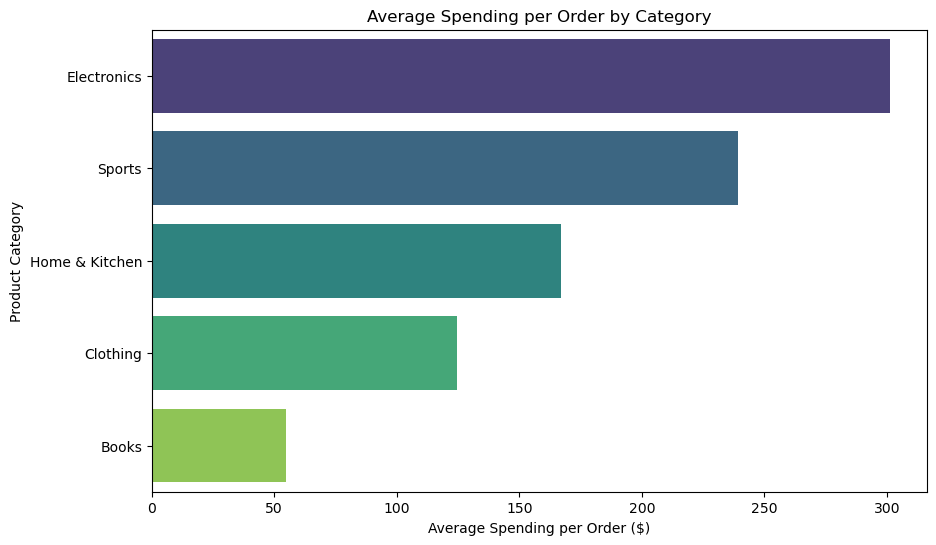

In [8]:
# Calculate average spending per order per category
category_avg_spending_per_order = df.groupby('Product Category')['Purchase Amount'].mean().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=category_avg_spending_per_order.values, y=category_avg_spending_per_order.index, palette='viridis')
plt.title('Average Spending per Order by Category')
plt.xlabel('Average Spending per Order ($)')
plt.ylabel('Product Category')
plt.show()

# Average Order Value (AOV)

Calculate the average order value and analyze its distribution.


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


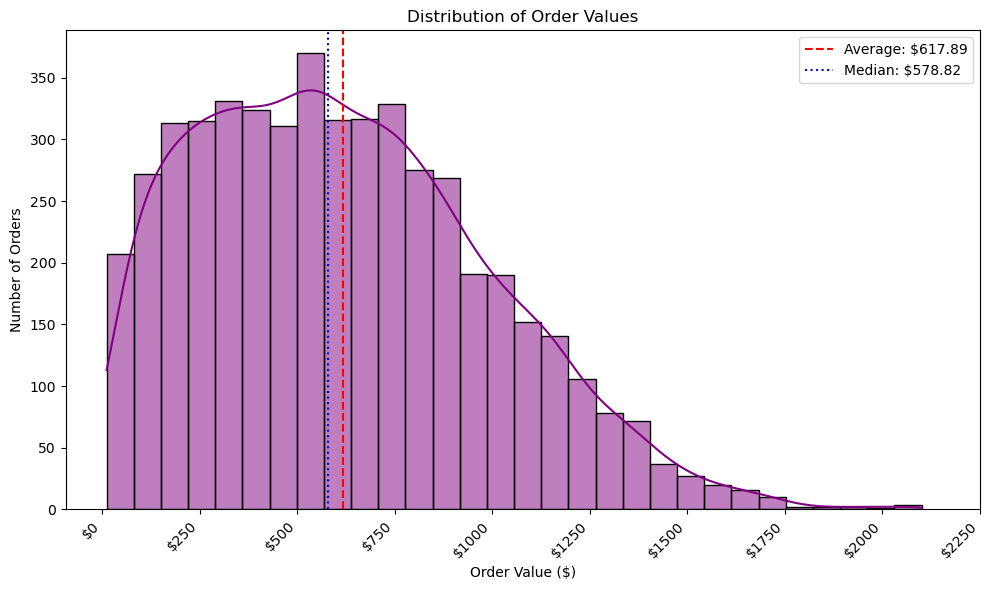

In [9]:
# Calculate order value per order
order_value = df.groupby('Order ID')['Purchase Amount'].sum()

# Calculate average and median order values
average_order_value = order_value.mean()
median_order_value = order_value.median()

# Visualization
plt.figure(figsize=(10, 6))
ax = sns.histplot(order_value, bins=30, kde=True, color='purple')

# Customize x-axis labels
x_ticks = range(0, int(order_value.max()) + 250, 250)  # Labels every $250
ax.set_xticks(x_ticks)
ax.set_xticklabels([f"${x}" for x in x_ticks], rotation=45, ha='right')  # Format as dollar amounts

# Add average and median lines and labels
plt.axvline(average_order_value, color='red', linestyle='--', label=f'Average: ${average_order_value:.2f}')
plt.axvline(median_order_value, color='blue', linestyle=':', label=f'Median: ${median_order_value:.2f}')

plt.title('Distribution of Order Values')
plt.xlabel('Order Value ($)')
plt.ylabel('Number of Orders')
plt.legend()
plt.tight_layout()  # Ensure labels fit
plt.show()


# Average Spending per Customer

Lifetime average (2023 in this case)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


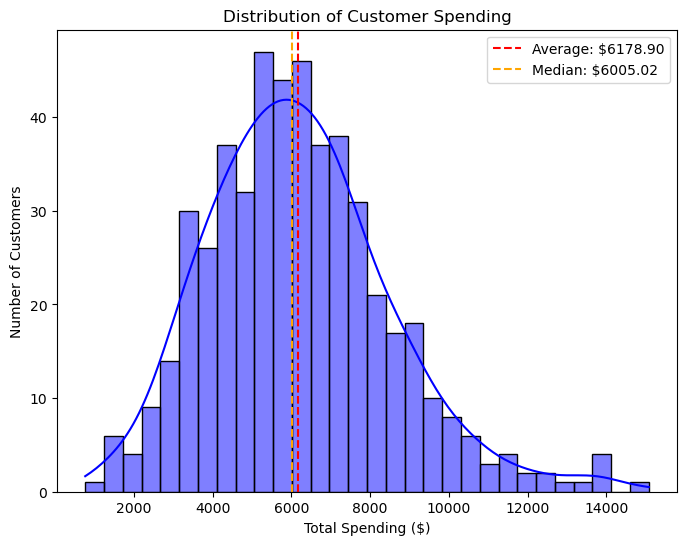

In [10]:
# Calculate total spending per customer
customer_spending = df.groupby('Customer ID')['Purchase Amount'].sum()

# Calculate average spending
average_spending = customer_spending.mean()
median_spending = customer_spending.median()


# Visualization
plt.figure(figsize=(8, 6))
sns.histplot(customer_spending, bins=30, kde=True, color='blue')
plt.axvline(average_spending, color='red', linestyle='--', label=f'Average: ${average_spending:.2f}')
plt.axvline(median_spending, color='orange', linestyle='--', label=f'Median: ${median_spending:.2f}')
plt.title('Distribution of Customer Spending')
plt.xlabel('Total Spending ($)')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

# Top Customers by Spending

Identify the top 10 customers by total spending. (Lifetime spending)

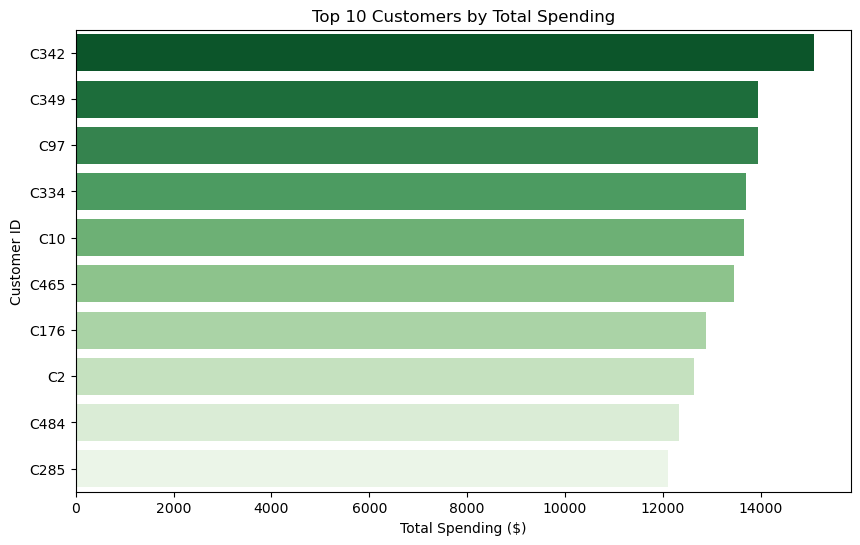

In [11]:
# Calculate total spending per customer
top_customers = customer_spending.sort_values(ascending=False).head(10)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='Greens_r')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spending ($)')
plt.ylabel('Customer ID')
plt.show()

# Monthly Revenue Trends

Analyze how revenue trends over time, by month

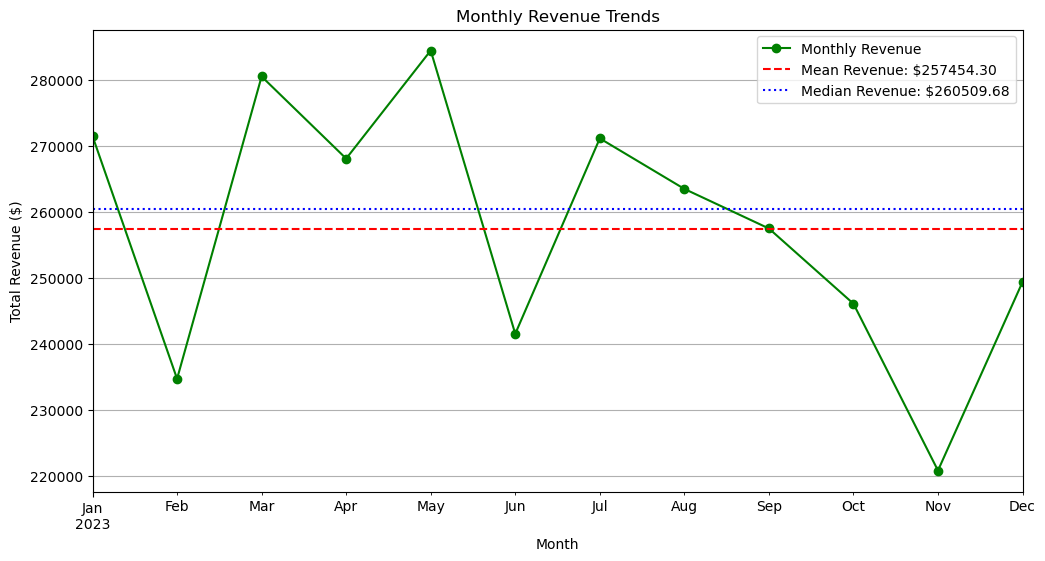

In [12]:
# Calculate monthly revenue
df['Purchase Month'] = df['Purchase Date'].dt.to_period('M')
monthly_revenue = df.groupby('Purchase Month')['Purchase Amount'].sum()

# Calculate mean and median monthly revenue
mean_revenue = monthly_revenue.mean()
median_revenue = monthly_revenue.median()

# Visualization
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='green', label='Monthly Revenue')

# Add horizontal lines for mean and median
plt.axhline(mean_revenue, color='red', linestyle='--', label=f'Mean Revenue: ${mean_revenue:.2f}')
plt.axhline(median_revenue, color='blue', linestyle=':', label=f'Median Revenue: ${median_revenue:.2f}')

plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.legend()
plt.show()


# Customer Cohort Analysis

Identifies when customers make their first purchase (cohort) and tracks retention over months.

In [13]:

# Create cohorts
df['Cohort Month'] = df.groupby('Customer ID')['Purchase Date'].transform('min').dt.to_period('M')
df['Order Month'] = df['Purchase Date'].dt.to_period('M')

# Calculate cohort index
cohort_data = df.groupby(['Cohort Month', 'Order Month']).agg(n_customers=('Customer ID', 'nunique')).reset_index()
cohort_data['Cohort Index'] = (cohort_data['Order Month'] - cohort_data['Cohort Month']).apply(lambda x: x.n)

# Pivot table for retention matrix
cohort_pivot = cohort_data.pivot_table(index='Cohort Month', columns='Cohort Index', values='n_customers')

# Fill NaN values with 0 to ensure all cells display values
cohort_pivot_filled = cohort_pivot.fillna(0)
# print(cohort_pivot_filled)



Value rendering problem on ipynb for heatmap.

Resoultion: Save the csv, and produce visualization using py script.

Result attached in the report

In [14]:
# Save the cohort pivot table to a CSV file
# cohort_pivot_filled.to_csv('customer_cohort_retention.csv', index=True)

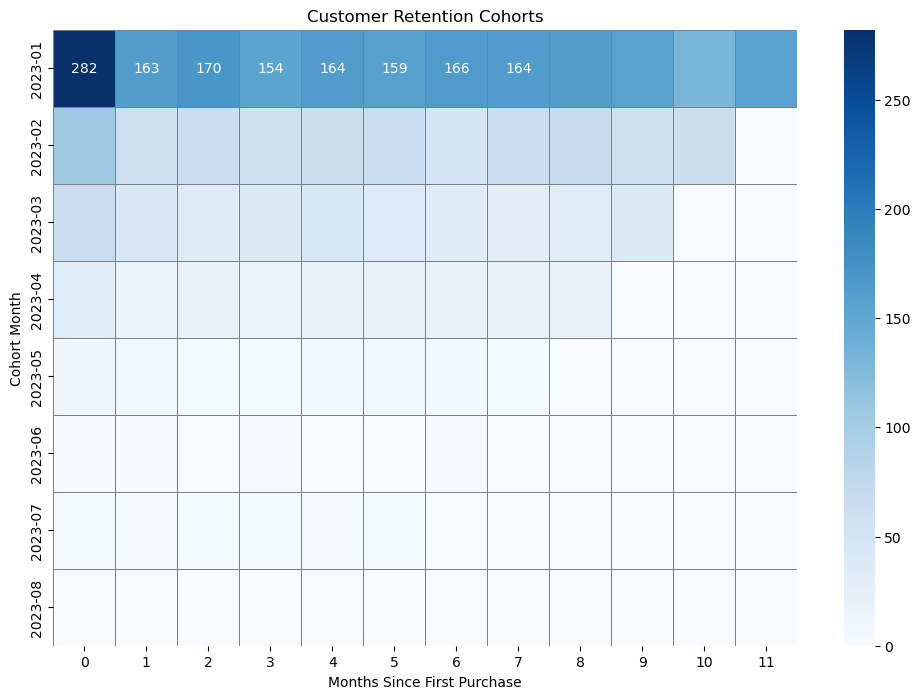

In [15]:
# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot_filled, annot=True, fmt='.0f', cmap='Blues', linewidths=0.5, linecolor='gray')
plt.title('Customer Retention Cohorts')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since First Purchase')
plt.show()
